In [ ]:
!pip install discopy

In [ ]:
!pip install pytket-qiskit

In [ ]:
!pip install pytket

## Drawing cooking recipes

In [ ]:
from discopy import Ob, Ty

egg, white, yolk = Ty('egg'), Ty('white'), Ty('yolk')

assert egg.objects == [Ob('egg')]
assert white @ yolk == Ty(Ob('white'), Ob('yolk'))

assert egg @ Ty() == egg == Ty() @ egg
assert egg @ (white @ yolk) == (egg @ white) @ yolk

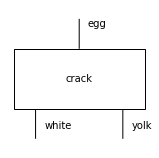

In [ ]:
from discopy import Box

crack = Box('crack', dom=egg, cod=white @ yolk)

crack.draw(figsize=(2, 2))

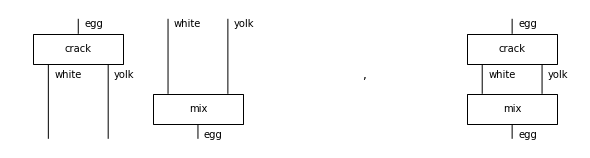

In [ ]:
from discopy import drawing

mix = Box('mix', white @ yolk, egg)

crack_tensor_mix = crack @ mix
crack_then_mix = crack >> mix

drawing.equation(crack_tensor_mix, crack_then_mix, space=2, symbol=', ', figsize=(8, 2))

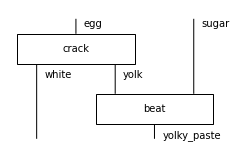

In [ ]:
from discopy import Id

assert crack >> Id(white @ yolk) == crack == Id(egg) >> crack
assert crack @ Id(Ty()) == crack == Id(Ty()) @ crack

sugar, yolky_paste = Ty('sugar'), Ty('yolky_paste')
beat = Box('beat', yolk @ sugar, yolky_paste)

crack_then_beat = crack @ Id(sugar) >> Id(white) @ beat

crack_then_beat.draw(figsize=(3, 2))

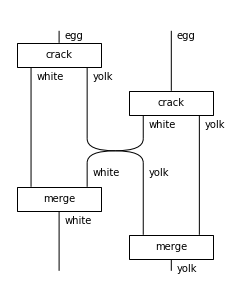

In [ ]:
from discopy import Swap

merge = lambda x: Box('merge', x @ x, x)

crack_two_eggs = crack @ crack\
    >> Id(white) @ Swap(yolk, white) @ Id(yolk)\
    >> merge(white) @ merge(yolk)

crack_two_eggs.draw(figsize=(3, 4))

In [ ]:
from discopy import Diagram

def pretty(diagram):
    return "Diagram(\n"\
    + "    dom={},\n".format(repr(diagram.dom))\
    + "    cod={},\n".format(repr(diagram.cod))\
    + "    boxes=[{}],\n".format(',\n           '.join(map(repr, diagram.boxes)))\
    + "    offsets={})".format(diagram.offsets)

assertion = "assert crack_two_eggs == {}".format(pretty(crack_two_eggs))

exec(assertion)
print(assertion)

assert crack_two_eggs == Diagram(
    dom=Ty('egg', 'egg'),
    cod=Ty('white', 'yolk'),
    boxes=[Box('crack', Ty('egg'), Ty('white', 'yolk')),
           Box('crack', Ty('egg'), Ty('white', 'yolk')),
           Swap(Ty('yolk'), Ty('white')),
           Box('merge', Ty('white', 'white'), Ty('white')),
           Box('merge', Ty('yolk', 'yolk'), Ty('yolk'))],
    offsets=[0, 2, 1, 0, 1])


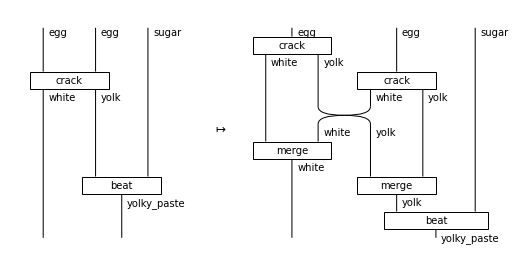

In [ ]:
from discopy import Functor

crack2 = Box("crack", egg @ egg, white @ yolk)

open_crack2 = Functor(
    ob=lambda x: x,
    ar={crack2: crack_two_eggs, beat: beat})

crack2_then_beat = crack2 @ Id(sugar) >> Id(white) @ beat

drawing.equation(
    crack2_then_beat,
    open_crack2(crack2_then_beat),
    symbol='$\\mapsto$', figsize=(7, 3.5))

## Tensors as boxes

In [ ]:
from discopy import Dim, Tensor

matrix = Tensor(Dim(2), Dim(2), [0, 1, 1, 0])

matrix.array

array([[0, 1],
       [1, 0]])

In [ ]:
assert matrix >> Tensor.id(Dim(2)) == matrix == Tensor.id(Dim(2)) >> matrix

vector = Tensor(Dim(1), Dim(2), [0, 1])

vector >> matrix

Tensor(dom=Dim(1), cod=Dim(2), array=[1, 0])

In [ ]:
assert Tensor.id(Dim(1)) @ matrix == matrix == matrix @ Tensor.id(Dim(1))

Tensor.id(Dim(1))

Tensor(dom=Dim(1), cod=Dim(1), array=[1.])

In [ ]:
vector @ vector

Tensor(dom=Dim(1), cod=Dim(2, 2), array=[0, 0, 0, 1])

In [ ]:
vector @ matrix

Tensor(dom=Dim(2), cod=Dim(2, 2), array=[0, 0, 0, 1, 0, 0, 1, 0])

import numpy as np

assert np.all(
    (matrix >> matrix).array == matrix.array.dot(matrix.array))
assert np.all(
    (matrix @ matrix).array == np.moveaxis(np.tensordot(
    matrix.array, matrix.array, 0), range(4), [0, 2, 1, 3]))

In [ ]:
matrix = Tensor(Dim(2), Dim(2), [0, -1j, 1j, 0])

matrix >> matrix[::-1]

Tensor(dom=Dim(2), cod=Dim(2), array=[1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

In [ ]:
vector1 = Tensor(Dim(1), Dim(2), [-1j, 1j])

vector >> vector1[::-1]

Tensor(dom=Dim(1), cod=Dim(1), array=[0.-1.j])

In [ ]:
vector + vector

Tensor(dom=Dim(1), cod=Dim(2), array=[0, 2])

In [ ]:
zero = Tensor.zeros(Dim(1), Dim(2))
assert vector + zero == vector == zero + vector

In [ ]:
swap = Tensor.swap(Dim(2), Dim(3))

assert swap.dom == Dim(2) @ Dim(3) and swap.cod == Dim(3) @ Dim(2)
assert swap >> swap[::-1] == Tensor.id(Dim(2, 3))
assert swap[::-1] >> swap == Tensor.id(Dim(3, 2))

matrix1 = Tensor(Dim(3), Dim(3), list(range(9)))

assert vector @ matrix1 >> swap == matrix1 @ vector
assert swap >> matrix1 @ matrix >> swap[::-1] == matrix @ matrix1

In [ ]:
cup, cap = Tensor.cups(Dim(2), Dim(2)), Tensor.caps(Dim(2), Dim(2))

print("cup == {}".format(cup))
print("cap == {}".format(cap))

cup == Tensor(dom=Dim(2, 2), cod=Dim(1), array=[1., 0., 0., 1.])
cap == Tensor(dom=Dim(1), cod=Dim(2, 2), array=[1., 0., 0., 1.])


In [ ]:
_id = Tensor.id(Dim(2))

assert cap @ _id >> _id @ cup == _id == _id @ cap >> cup @ _id

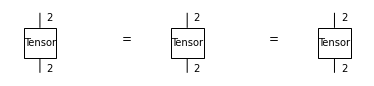

In [ ]:
drawing.equation(cap @ _id >> _id @ cup, _id, _id @ cap >> cup @ _id, figsize=(5, 1))

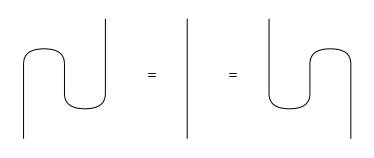

In [ ]:
from discopy import Cup, Cap

left_snake = Cap(Dim(2), Dim(2)) @ Id(Dim(2)) >> Id(Dim(2)) @ Cup(Dim(2), Dim(2))
right_snake = Id(Dim(2)) @ Cap(Dim(2), Dim(2)) >> Cup(Dim(2), Dim(2)) @ Id(Dim(2))

drawing.equation(left_snake, Id(Dim(2)), right_snake, figsize=(5, 2), draw_type_labels=False)

In [ ]:
from discopy import tensor

_eval = tensor.Functor(
    ob=lambda x: x,
    ar=lambda f: f)

assert _eval(left_snake) == _eval(Id(Dim(2))) == _eval(right_snake)


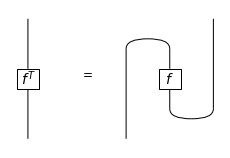

In [ ]:
f = tensor.Box("$f$", Dim(2), Dim(2), [1, 2, 3, 4])
f_T = tensor.Box("$f^T$", Dim(2), Dim(2), [1, 3, 2, 4])

diagram = tensor.Diagram(
    dom=Dim(2), cod=Dim(2),
    boxes=[Cap(Dim(2), Dim(2)), f, Cup(Dim(2), Dim(2))],
    offsets=[0, 1, 1])

drawing.equation(f_T, diagram, figsize=(3, 2), fontsize=14, draw_type_labels=False)

assert not f_T == diagram
assert f_T.eval() == diagram.eval()

In [ ]:
%timeit diagram.eval()

100 loops, best of 5: 8.18 ms per loop


In [ ]:
%timeit f_T.eval()

1000 loops, best of 5: 321 µs per loop


## Drawing quantum circuits

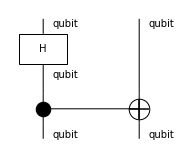

In [ ]:
import numpy as np
from discopy.quantum import qubit, H, Id, CX, QuantumGate

assert H == QuantumGate("H", 1, 1 / np.sqrt(2) * np.array([1, 1, 1, -1]), _dagger=None)

circuit = H @ Id(qubit) >> CX

circuit.draw(figsize=(2, 2), draw_type_labels=True, margins=(.1, .1))

In [ ]:
assert H.eval() == H.array
assert Id(qubit).eval() == Tensor.id(Dim(2))

assert circuit.eval() == H.eval() @ Id(qubit).eval() >> CX.eval()

CX >> H @ Id(1)


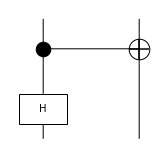

In [ ]:
print(circuit[::-1])
circuit[::-1].draw(figsize=(2, 2), margins=(.1,.1))

In [ ]:
assert (CX >> CX[::-1]).eval() == Id(qubit ** 2).eval()
assert np.all(np.isclose((H >> H[::-1]).eval(), Id(qubit).eval()))

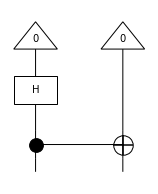

In [ ]:
from discopy.quantum import Ket

(Ket(0, 0) >> circuit).draw(figsize=(2, 2.5))

In [ ]:
(Ket(0, 0) >> circuit).eval()

Tensor(dom=Dim(1), cod=Dim(2, 2), array=[0.70710678+0.j, 0.    +0.j, 0.    +0.j, 0.70710678+0.j])

amplitude:


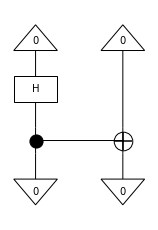

probability: 0.4999999999999999


In [ ]:
from discopy.quantum import Bra

experiment = Ket(0, 0) >> circuit >> Bra(0, 0)

print("amplitude:")
experiment.draw(figsize=(2, 3))
amplitude = experiment.eval().array

probability = abs(amplitude) ** 2
print("probability: {}".format(probability))

In [ ]:
from discopy.quantum import Measure, Discard

print(Discard().eval())
print(Measure().eval())

CQMap(dom=Q(Dim(2)), cod=CQ(), array=[1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])
CQMap(dom=Q(Dim(2)), cod=C(Dim(2)), array=[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])


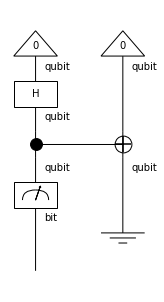

CQMap(dom=CQ(), cod=C(Dim(2)), array=[0.5+0.j, 0.5+0.j])

In [ ]:
(Ket(0, 0) >> circuit >> Measure() @ Discard()).draw(figsize=(2, 4))
(Ket(0, 0) >> circuit >> Measure() @ Discard()).eval()

In [ ]:
from discopy.quantum import SWAP

circuit.to_tk()

tk.Circuit(2).H(0).CX(0, 1)

In [ ]:
(SWAP >> circuit >> SWAP).to_tk()

tk.Circuit(2).H(1).CX(1, 0)

In [ ]:
from pytket.extensions.qiskit import AerBackend

aer = AerBackend()

(circuit >> Measure() @ Discard()).eval(backend=aer)

Tensor(dom=Dim(1), cod=Dim(2), array=[0.48242188+0.j, 0.51757812+0.j])

## Drawing grammatical structure

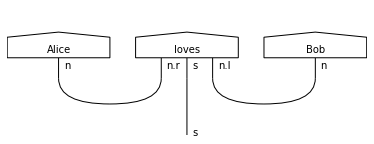

In [ ]:
from discopy import Ty, Id, Word, Cup, pregroup

n, s = Ty('n'), Ty('s')

Alice = Word("Alice", n)
loves = Word("loves", n.r @ s @ n.l)
Bob = Word("Bob", n)

grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)

sentence = Alice @ loves @ Bob >> grammar
pregroup.draw(sentence, figsize=(5, 5))

In [ ]:
F = tensor.Functor(
    ob={n: 2, s: 1},
    ar={Alice: [0, 1], loves: [0, 1, 1, 0], Bob: [1, 0]})

print(F(Alice @ loves @ Bob))
print(F(grammar))

assert F(Alice @ loves @ Bob >> grammar) == 1

Tensor(dom=Dim(1), cod=Dim(2, 2, 2, 2), array=[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.])
Tensor(dom=Dim(2, 2, 2, 2), cod=Dim(1), array=[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])


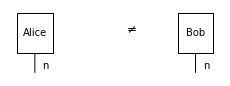

In [ ]:
assert not F(Alice) >> F(Bob)[::-1]

drawing.equation(Alice, Bob, symbol="$\\neq$", figsize=(3, 1))

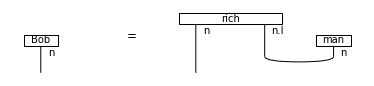

In [ ]:
rich, man = Word("rich", n @ n.l), Word("man", n)

F.ar[rich], F.ar[man] = [1, 0, 0, 0], [1, 0]

rich_man = rich @ man >> Id(n) @ Cup(n.l, n)

assert F(Bob) >> F(rich_man)[::-1]  # i.e. Bob is a rich man.

drawing.equation(Bob, rich_man, figsize=(5, 1))

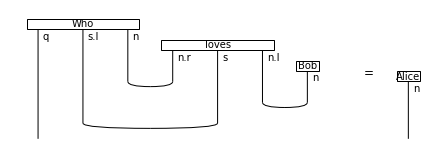

In [ ]:
q = Ty('q')

Who = Word("Who", q @ s.l @ n)

F.ob[q], F.ar[Who] = 2, [1, 0, 0, 1]

question = Who @ loves @ Bob\
    >> Id(q @ s.l) @ Cup(n, n.r) @ Id(s) @ Cup(n.l, n)\
    >> Id(q) @ Cup(s.l, s)

answer = Alice

assert F(question) == F(answer)

drawing.equation(question, answer, figsize=(6, 2))

## Implementation: QNLP

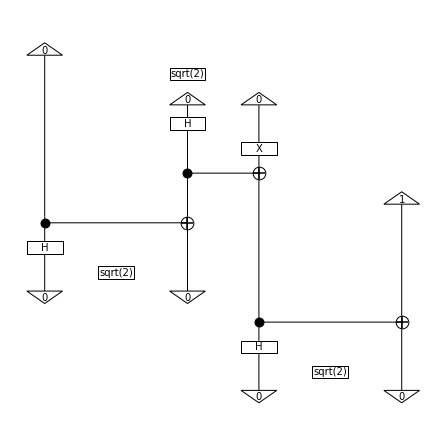

In [ ]:
from discopy.quantum import circuit, qubit, sqrt, X

F_ = circuit.Functor(
    ob={s: Ty(), n: qubit},
    ar={Alice: Ket(0),
        loves: sqrt(2) @ Ket(0, 0) >> H @ X >> CX,
        Bob: Ket(1)})

F_(sentence).draw(figsize=(6, 6))

assert F_(sentence).eval() == F(sentence)

# QNLP Experiment : Quantum Hardware experiment

In [ ]:
from discopy import Ty, Word

s, n = Ty('s'), Ty('n')
Alice = Word('Alice', n)
loves = Word('loves', n.r @ s @ n.l)
Bob =  Word('Bob', n)
who = Word('who', n.r @ n @ s.l @ n)
is_rich = Word('is rich', n.r @ s)
is_famous = Word('is famous', n.r @ s)
wears = Word('wears', n.r @ s @ n.l)
blue = Word('blue', n @ n.l )
hats = Word('hats',n)
shows = Word('shows', n.r @ s @ n.l)
calls = Word('calls', n.r @ s @ n.l )
an_d = Word('and',n.r @ n @ n.l)
are = Word('are',n.r @ s @ n.l)
tells = Word('tells',n.r @ s @n.l)
cats = Word('Cats',n)
vocab = [Alice, loves, Bob, who, is_rich, is_famous,wears,blue,hats,shows,calls,an_d,are,tells,cats]

In [ ]:
from time import time
from discopy.grammar import brute_force

gen, n_sentences = brute_force(*vocab), 500
sentences, parsing = list(), dict()

print("Brute force search for grammatical sentences:")

start = time()
for i in range(n_sentences):
    diagram = next(gen)
    sentence = ' '.join(str(w)
        for w in diagram.boxes if isinstance(w, Word)) + '.'
    sentences.append(sentence)
    parsing.update({sentence: diagram})
    #print(sentence)

print("\n{:.2f} seconds to generate {} sentences.".format(time() - start, n_sentences))

Brute force search for grammatical sentences:

219.37 seconds to generate 500 sentences.


Diagram for 'Alice who loves Bob is rich.':


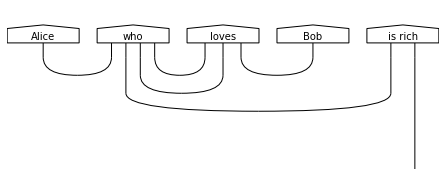

In [ ]:
from discopy.grammar import draw
print("Diagram for 'Alice who loves Bob is rich.':")
draw(parsing['Alice who loves Bob is rich.'], draw_type_labels=False)

Circuit for the GHZ state, used as ansatz for "who":


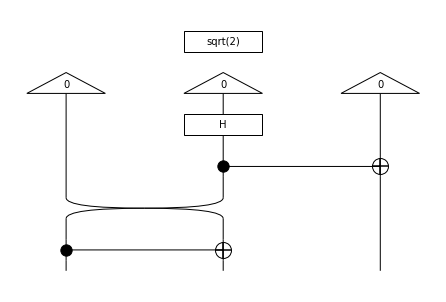

In [ ]:
from discopy.quantum import Circuit, sqrt, Ket, H, Rx, CX, SWAP

# Ansatz for words with type `n`, e.g. 'Alice', 'Bob'
def intransitive_ansatz(phase):
    return Ket(0) >> Rx(phase)

# Ansatz for words with type `n.r @ s @ n.l`, e.g. 'loves'
def transitive_ansatz(phase):
    return sqrt(2) @ Ket(0, 0) >> H @ Rx(phase) >> CX

GHZ = sqrt(2) @ Ket(0, 0, 0)\
    >> Circuit.id(1) @ H @ Circuit.id(1)\
    >> Circuit.id(1) @ CX\
    >> (SWAP >>  CX) @ Circuit.id(1)

print("Circuit for the GHZ state, used as ansatz for \"who\":")
GHZ.draw(aspect='auto', draw_type_labels=False)

Circuit for 'Alice who loves Bob is rich.':


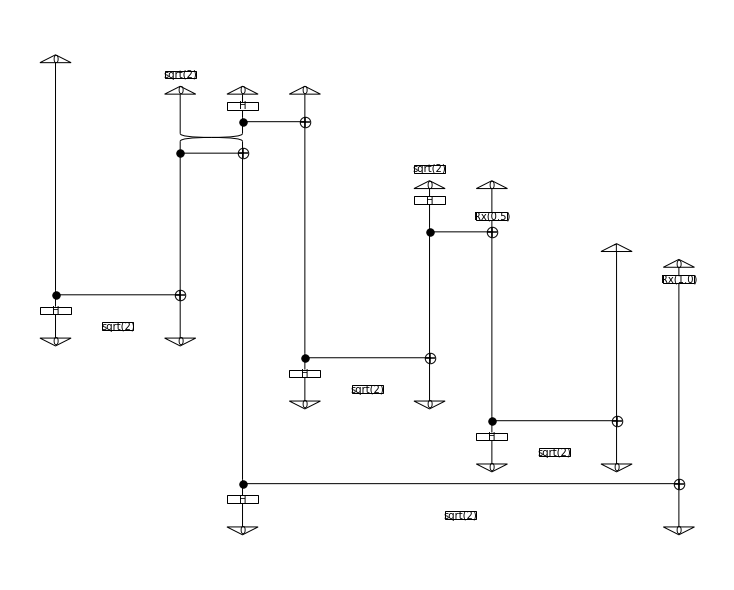

In [ ]:
import numpy as np
from discopy import CircuitFunctor, qubit

F = lambda params: CircuitFunctor(
    ob={s: qubit ** 0, n: qubit ** 1},
    ar={Alice: Ket(0),
        loves: transitive_ansatz(params[0]),
        Bob: Ket(1),
        who: GHZ,
        is_rich: intransitive_ansatz(params[1]),
        is_famous: intransitive_ansatz(params[1]),
        wears: transitive_ansatz(params[0]),
        blue:transitive_ansatz(params[0]),
        hats: Ket(1),
        shows :transitive_ansatz(params[0]) ,
        calls : transitive_ansatz(params[0]),
        an_d:GHZ,
        are:transitive_ansatz(params[0]),
        tells:transitive_ansatz(params[0]),
        cats:Ket(1),
        })

params0 = np.array([0.5, 1.0])
print("Circuit for 'Alice who loves Bob is rich.':")
circuit = F(params0)(parsing['Alice who loves Bob is rich.'])
circuit.draw(figsize=(10, 8), aspect='auto', draw_type_labels=False)

In [ ]:
from pytket.extensions.qiskit import tk_to_qiskit

tk_circ = circuit.to_tk()
print("{}:\n{}\n".format(tk_circ, '\n'.join(map(str, tk_circ))))
print("post selection:\n{}\n".format(tk_circ.post_selection))
print("scalar:\n{}\n".format(tk_circ.scalar))
print("qiskit circuit:")
tk_to_qiskit(tk_circ).draw()

<tket::Circuit, qubits=8, gates=24>:
H q[1];
H q[4];
Rx(1) q[5];
X q[6];
Rx(2) q[7];
CX q[1], q[3];
CX q[4], q[5];
CX q[1], q[2];
CX q[3], q[4];
CX q[5], q[6];
Measure q[4] --> c[3];
Measure q[6] --> c[5];
CX q[0], q[1];
CX q[2], q[7];
H q[3];
H q[5];
Measure q[1] --> c[1];
Measure q[3] --> c[2];
Measure q[5] --> c[4];
Measure q[7] --> c[7];
H q[0];
H q[2];
Measure q[0] --> c[0];
Measure q[2] --> c[6];

post selection:
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}

scalar:
64.00000000000009

qiskit circuit:


┌───┐                   ┌─┐   
q_0: ──────────────────────■──┤ H ├───────────────────┤M├───
       ┌───┐             ┌─┴─┐└───┘     ┌─┐           └╥┘   
q_1: ──┤ H ├─────■────■──┤ X ├──────────┤M├────────────╫────
       └───┘     │  ┌─┴─┐└───┘          └╥┘┌───┐       ║ ┌─┐
q_2: ────────────┼──┤ X ├────────────■───╫─┤ H ├───────╫─┤M├
               ┌─┴─┐└───┘┌───┐       │   ║ └┬─┬┘       ║ └╥┘
q_3: ──────────┤ X ├──■──┤ H ├───────┼───╫──┤M├────────╫──╫─
       ┌───┐   └───┘┌─┴─┐└┬─┬┘       │   ║  └╥┘        ║  ║ 
q_4: ──┤ H ├─────■──┤ X ├─┤M├────────┼───╫───╫─────────╫──╫─
     ┌─┴───┴─┐ ┌─┴─┐└───┘ └╥┘ ┌───┐  │   ║   ║  ┌─┐    ║  ║ 
q_5: ┤ Rx(π) ├─┤ X ├──■────╫──┤ H ├──┼───╫───╫──┤M├────╫──╫─
     └─┬───┬─┘ └───┘┌─┴─┐  ║  └┬─┬┘  │   ║   ║  └╥┘    ║  ║ 
q_6: ──┤ X ├────────┤ X ├──╫───┤M├───┼───╫───╫───╫─────╫──╫─
     ┌─┴───┴──┐     └───┘  ║   └╥┘ ┌─┴─┐ ║   ║   ║ ┌─┐ ║  ║ 
q_7: ┤ Rx(2π) ├────────────╫────╫──┤ X ├─╫───╫───╫─┤M├─╫──╫─
     └────────┘            ║    ║  └───┘ ║   ║   ║ └╥┘ ║  ║ 
c: 8/══════════════════════╩════╩════════╩═══╩═══╩══╩══╩══╩═
                           3    5        1   2   4  7  0  6

In [ ]:
from pytket.extensions.qiskit import AerBackend

def evaluate(params, sentences, backend=AerBackend(), n_shots=2**10, seed=0):
    circuits = [F(params)(parsing[s]) for s in sentences]
    results = [Circuit.eval(
                circuit,
                backend=backend,
                n_shots=n_shots,
                seed=seed,
                compilation=backend.default_compilation_pass(2)) for circuit in circuits]
    tensors = [np.abs(result.array) for result in results]
    return tensors

In [ ]:
start = time()
corpus = dict(zip(sentences, evaluate(params0, sentences, backend=AerBackend())))
print("{:.3f} seconds to compute the corpus.\n".format(time() - start))

delta = .01

print("True sentences:\n{}\n".format('\n'.join("{} ({:.3f})".format(sentence, scalar)
    for sentence, scalar in corpus.items() if scalar > .5 + delta)))
print("False sentences:\n{}\n".format('\n'.join("{} ({:.3f})".format(sentence, scalar)
    for sentence, scalar in corpus.items() if scalar < .5 - delta)))
print("Maybe sentences:\n{}".format('\n'.join("{} ({:.3f})".format(sentence, scalar)
    for sentence, scalar in corpus.items() if .5 - delta <= scalar <= .5 + delta)))

47.226 seconds to compute the corpus.

True sentences:
Alice is rich. (0.984)
Alice is famous. (0.984)
Alice loves Bob. (0.930)
Alice loves hats. (0.930)
Alice loves Cats. (0.930)
Alice wears Bob. (0.930)
Alice wears hats. (0.930)
Alice wears Cats. (0.930)
Alice shows Bob. (0.930)
Alice shows hats. (0.930)
Alice shows Cats. (0.930)
Alice calls Bob. (0.930)
Alice calls hats. (0.930)
Alice calls Cats. (0.930)
Alice are Bob. (0.930)
Alice are hats. (0.930)
Alice are Cats. (0.930)
Alice tells Bob. (0.930)
Alice tells hats. (0.930)
Alice tells Cats. (0.930)
Bob loves Alice. (0.930)
Bob wears Alice. (0.930)
Bob shows Alice. (0.930)
Bob calls Alice. (0.930)
Bob are Alice. (0.930)
Bob tells Alice. (0.930)
blue Bob is rich. (0.930)
blue Bob is famous. (0.930)
blue hats is rich. (0.930)
blue hats is famous. (0.930)
blue Cats is rich. (0.930)
blue Cats is famous. (0.930)
hats loves Alice. (0.930)
hats wears Alice. (0.930)
hats shows Alice. (0.930)
hats calls Alice. (0.930)
hats are Alice. (0.930)

In [ ]:
from sklearn.model_selection import train_test_split

sentence_train, sentence_test = train_test_split(sentences, test_size=0.5, random_state=237)

print("Training set:\n{}\n".format('\n'.join(sentence_train)))
print("Testing set:\n{}".format('\n'.join(sentence_test)))

Training set:
Bob shows hats.
Alice loves Cats.
Bob tells Alice.
Cats and hats is rich.
blue Bob wears Cats.
blue hats calls hats.
blue hats are hats.
Alice who shows hats is famous.
blue Alice loves Bob.
Cats loves Bob.
Alice wears blue blue Alice.
Alice wears Bob.
Bob is rich.
blue hats wears Cats.
blue Cats are hats.
Alice who loves Alice is famous.
hats calls blue Bob.
Bob who is famous is rich.
Bob loves blue hats.
Bob and Alice is rich.
Alice are blue Alice.
Cats tells Cats.
Bob are Alice.
Alice who is rich calls hats.
blue Alice loves Alice.
Alice are Alice.
Alice wears Alice.
Alice and Alice shows hats.
hats tells blue Alice.
Bob tells Cats.
blue Alice calls Alice.
hats calls Bob.
blue Bob calls Alice.
hats and hats is famous.
Alice who is famous are Cats.
Alice tells blue Cats.
hats wears hats.
Alice who is famous is famous.
Cats shows blue Alice.
blue blue Alice is rich.
Alice who calls Cats is rich.
Alice who is famous calls Bob.
Alice tells Cats.
hats wears blue Alice.
Alic

In [ ]:
def loss(params, sentences=sentence_train):
    return - np.mean(np.array([
        (corpus[sentence] - scalar) ** 2
        for sentence, scalar in zip(sentences, evaluate(params, sentences))]))

In [ ]:
from random import random, seed; seed(337)

params = np.array([random(), random()])

print("Random initialisation: {}".format(params))

print("\nIs Alice who loves Bob rich?")
print("Yes, she is."
      if evaluate(params, ['Alice who loves Bob is rich.'])[0] > .5 + delta
      else "No, she isn't.")

Random initialisation: [0.2018591  0.83909858]

Is Alice who loves Bob rich?
No, she isn't.


In [ ]:
!pip install noisyopt

In [ ]:
import noisyopt

i, start = 0, time()

def callback(params):
    global i
    i += 1
    print("Epoch {} ({:.0f} seconds since start): {}".format(i, time() - start, params))

result = noisyopt.minimizeSPSA(
    loss, params, paired=False, callback=callback, niter=10, a=2)
result

Epoch 1 (77 seconds since start): [0.2018591  0.83909858]
Epoch 2 (150 seconds since start): [0.19083937 0.85011832]
Epoch 3 (198 seconds since start): [0.25664059 0.91591953]
Epoch 4 (255 seconds since start): [0.36807678 0.80448334]
Epoch 5 (301 seconds since start): [0.4733248  0.69923532]
Epoch 6 (348 seconds since start): [0.43908037 0.73347975]
Epoch 7 (395 seconds since start): [0.45294582 0.7196143 ]
Epoch 8 (441 seconds since start): [0.58275431 0.84942279]
Epoch 9 (490 seconds since start): [0.47495798 0.95721912]
Epoch 10 (538 seconds since start): [0.49248754 0.93968957]


     fun: -0.00017993164062500032
 message: 'terminated after reaching max number of iterations'
    nfev: 20
     nit: 10
 success: True
       x: array([0.49248754, 0.93968957])

In [ ]:
print("Testing loss: {}".format(loss(result.x, sentences=sentence_test)))

Testing loss: -0.00030639648437500073


In [ ]:
print("Is Alice who loves cats?")
print("Yes, she is."
      if evaluate(result.x, ['Alice loves Cats.'])[0] > .5 + delta
      else "No, she isn't.")

Is Alice who loves cats?
Yes, she is.


In [ ]:
print("Is Alice who shows blue cats?")
print("Yes."
      if evaluate(result.x, ['Alice shows blue Cats.'])[0] > .5 + delta
      else "No")

Is Alice who shows blue cats?
No
